# Social Media Marketing Analysis

This project analyzes synthetic social media advertising data to uncover insights that 
help optimize ad targeting, improve ROI, and increase conversions. We explore user behavior across platforms,
demographics, and ad creatives using Python and pandas.

**Data Sources:**
- `ads.csv`: Ad creatives and targeting
- `campaigns.csv`: Campaign budgets and timelines
- `ad_events.csv`: User interactions (impressions, clicks, purchases)
- `users.csv`: Demographics 

**Goals:**
- Understand conversion funnels
- Identify high-performing segments
- Recommend improvements for future campaigns

##### we will import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Loading

In [2]:
#Read the Data into DataFrame
ads = pd.read_csv('ads.csv')
ads


,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests
0,1,28,Facebook,Video,Female,35-44,"art, technology"
1,2,33,Facebook,Stories,All,25-34,"travel, photography"
2,3,20,Instagram,Carousel,All,25-34,technology
3,4,28,Facebook,Stories,Female,25-34,news
4,5,24,Instagram,Image,Female,25-34,news
...,...,...,...,...,...,...,...
195,196,12,Facebook,Stories,Male,35-44,"gaming, sports"
196,197,9,Facebook,Stories,All,All,"lifestyle, gaming"
197,198,34,Facebook,Video,All,35-44,"fitness, lifestyle"
198,199,15,Instagram,Video,Male,25-34,"art, news"


In [3]:
campaigns = pd.read_csv('campaigns.csv')
campaigns

,campaign_id,name,start_date,end_date,duration_days,total_budget
0,1,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32
1,2,Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41
2,3,Campaign_3_Winter,2025-05-04,2025-06-29,56,14343.25
3,4,Campaign_4_Summer,2025-06-04,2025-08-08,65,45326.60
4,5,Campaign_5_Launch,2025-07-11,2025-08-28,48,68376.69
5,6,Campaign_6_Winter,2025-06-21,2025-09-13,84,78607.49
6,7,Campaign_7_Winter,2025-05-25,2025-08-05,72,43744.59
7,8,Campaign_8_Q3,2025-02-25,2025-04-07,41,39953.19
8,9,Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07
9,10,Campaign_10_Winter,2025-05-17,2025-07-21,65,19669.27


In [4]:
ad_events = pd.read_csv('ad_events.csv', parse_dates=['timestamp'])
ad_events

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression
...,...,...,...,...,...,...,...
399995,399996,132,3cb8c,2025-08-01 22:36:54,Friday,Evening,Impression
399996,399997,200,fe0e3,2025-05-31 14:53:18,Saturday,Afternoon,Impression
399997,399998,2,a08c1,2025-07-27 13:39:51,Sunday,Afternoon,Click
399998,399999,109,4f0cf,2025-05-16 02:38:23,Friday,Night,Impression


In [5]:
users=pd.read_csv('users.csv')
users

,user_id,user_gender,user_age,age_group,country,location,interests
0,a2474,Female,24,18-24,United Kingdom,New Mariomouth,"fitness, health"
1,141e5,Male,21,18-24,Germany,Danielsfort,"food, fitness, lifestyle"
2,34db0,Male,27,25-34,Australia,Vincentchester,"fashion, news"
3,20d08,Female,28,25-34,India,Lisaport,"health, news, finance"
4,9e830,Male,28,25-34,United States,Brownmouth,"health, photography, lifestyle"
...,...,...,...,...,...,...,...
9995,24364,Male,18,18-24,United States,Curtisside,"travel, fashion, art"
9996,68b82,Male,24,18-24,Mexico,Brownland,finance
9997,39f39,Male,29,25-34,United States,Watersburgh,health
9998,0b8e7,Male,31,25-34,United Kingdom,South Kenneth,"art, fashion"


In [6]:
#Merging ads with Campaigns
ads_campaigns = ads.merge(campaigns, on='campaign_id', how='left')
ads_campaigns

,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests,name,start_date,end_date,duration_days,total_budget
0,1,28,Facebook,Video,Female,35-44,"art, technology",Campaign_28_Winter,2025-05-09,2025-06-30,52,32844.79
1,2,33,Facebook,Stories,All,25-34,"travel, photography",Campaign_33_Summer,2025-04-08,2025-07-04,87,59264.68
2,3,20,Instagram,Carousel,All,25-34,technology,Campaign_20_Winter,2025-02-17,2025-05-18,90,98904.66
3,4,28,Facebook,Stories,Female,25-34,news,Campaign_28_Winter,2025-05-09,2025-06-30,52,32844.79
4,5,24,Instagram,Image,Female,25-34,news,Campaign_24_Summer,2025-03-30,2025-05-23,54,56692.87
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,12,Facebook,Stories,Male,35-44,"gaming, sports",Campaign_12_Q3,2025-03-08,2025-06-01,85,30525.65
196,197,9,Facebook,Stories,All,All,"lifestyle, gaming",Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07
197,198,34,Facebook,Video,All,35-44,"fitness, lifestyle",Campaign_34_Winter,2025-07-10,2025-09-08,60,26104.30
198,199,15,Instagram,Video,Male,25-34,"art, news",Campaign_15_Launch,2025-03-21,2025-06-11,82,85407.23


In [7]:
events_ads_campaigns = ad_events.merge(ads_campaigns, on='ad_id', how='left')
events_ads_campaigns

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests,name,start_date,end_date,duration_days,total_budget
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,All,All,"lifestyle, gaming",Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,All,18-24,photography,Campaign_26_Winter,2025-04-01,2025-06-17,77,44538.87
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,All,35-44,"technology, travel",Campaign_10_Winter,2025-05-17,2025-07-21,65,19669.27
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,All,All,fashion,Campaign_14_Summer,2025-04-15,2025-06-04,50,39849.94
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,Female,35-44,"health, lifestyle",Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399996,132,3cb8c,2025-08-01 22:36:54,Friday,Evening,Impression,1,Facebook,Carousel,Female,18-24,news,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32
399996,399997,200,fe0e3,2025-05-31 14:53:18,Saturday,Afternoon,Impression,44,Instagram,Carousel,Male,18-24,photography,Campaign_44_Q3,2025-07-14,2025-09-22,70,15914.87
399997,399998,2,a08c1,2025-07-27 13:39:51,Sunday,Afternoon,Click,33,Facebook,Stories,All,25-34,"travel, photography",Campaign_33_Summer,2025-04-08,2025-07-04,87,59264.68
399998,399999,109,4f0cf,2025-05-16 02:38:23,Friday,Night,Impression,8,Facebook,Stories,All,35-44,"travel, fashion",Campaign_8_Q3,2025-02-25,2025-04-07,41,39953.19


In [8]:
full_data = events_ads_campaigns.merge(users, on='user_id', how='left')
full_data

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,...,start_date,end_date,duration_days,total_budget,user_gender,user_age,age_group,country,location,interests
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,...,2025-05-25,2025-07-13,49,40094.07,Female,24,18-24,United States,West Shawna,"gaming, food"
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,...,2025-04-01,2025-06-17,77,44538.87,Female,30,25-34,United States,Meyersland,"photography, finance"
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,...,2025-05-17,2025-07-21,65,19669.27,Male,20,18-24,United States,Barrerahaven,"fashion, sports, travel"
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,...,2025-04-15,2025-06-04,50,39849.94,Female,18,18-24,United States,Lake Angelaland,"food, art"
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,...,2025-04-16,2025-07-07,82,79342.41,Male,58,55-65,United Kingdom,Robinsonberg,"finance, lifestyle"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403962,399996,132,3cb8c,2025-08-01 22:36:54,Friday,Evening,Impression,1,Facebook,Carousel,...,2025-05-25,2025-07-23,59,24021.32,Male,16,16-17,United States,Port Andres,"fashion, fitness, photography"
403963,399997,200,fe0e3,2025-05-31 14:53:18,Saturday,Afternoon,Impression,44,Instagram,Carousel,...,2025-07-14,2025-09-22,70,15914.87,Male,29,25-34,United States,North Christina,"photography, art"
403964,399998,2,a08c1,2025-07-27 13:39:51,Sunday,Afternoon,Click,33,Facebook,Stories,...,2025-04-08,2025-07-04,87,59264.68,Female,28,25-34,United States,Candicestad,"photography, finance, lifestyle"
403965,399999,109,4f0cf,2025-05-16 02:38:23,Friday,Night,Impression,8,Facebook,Stories,...,2025-02-25,2025-04-07,41,39953.19,Other,27,25-34,Germany,North Anitafort,"food, fashion"


In [9]:
full_data.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,...,start_date,end_date,duration_days,total_budget,user_gender,user_age,age_group,country,location,interests
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,...,2025-05-25,2025-07-13,49,40094.07,Female,24,18-24,United States,West Shawna,"gaming, food"
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,...,2025-04-01,2025-06-17,77,44538.87,Female,30,25-34,United States,Meyersland,"photography, finance"
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,...,2025-05-17,2025-07-21,65,19669.27,Male,20,18-24,United States,Barrerahaven,"fashion, sports, travel"
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,...,2025-04-15,2025-06-04,50,39849.94,Female,18,18-24,United States,Lake Angelaland,"food, art"
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,...,2025-04-16,2025-07-07,82,79342.41,Male,58,55-65,United Kingdom,Robinsonberg,"finance, lifestyle"


In [10]:
full_data.describe()

,event_id,ad_id,timestamp,campaign_id,duration_days,total_budget,user_age
count,403967.000000,403967.000000,403967,403967.000000,403967.000000,403967.000000,403967.000000
mean,200034.495771,100.524857,2025-06-22 01:10:07.907781632,25.126013,66.377098,51166.910081,27.689334
min,1.000000,1.000000,2025-05-07 14:11:57,1.000000,32.000000,7918.040000,16.000000
25%,100030.500000,51.000000,2025-05-30 07:56:23,13.000000,52.000000,28962.340000,21.000000
50%,200044.000000,101.000000,2025-06-22 00:12:50,25.000000,70.000000,48832.610000,27.000000
75%,300051.500000,151.000000,2025-07-14 19:46:19.500000,37.000000,82.000000,71626.830000,32.000000
max,400000.000000,200.000000,2025-08-06 14:11:30,50.000000,90.000000,98904.660000,65.000000
std,115476.514725,57.781894,NaN,13.676503,16.783368,25583.216728,8.320411


## Step 2: Data Cleaning

In [11]:
full_data.isnull().sum()

event_id            0
ad_id               0
user_id             0
timestamp           0
day_of_week         0
time_of_day         0
event_type          0
campaign_id         0
ad_platform         0
ad_type             0
target_gender       0
target_age_group    0
target_interests    0
name                0
start_date          0
end_date            0
duration_days       0
total_budget        0
user_gender         0
user_age            0
age_group           0
country             0
location            0
interests           0
dtype: int64

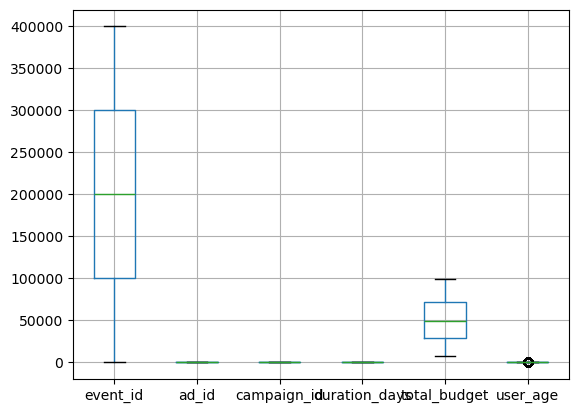

<Figure size 800x2000 with 0 Axes>

In [12]:
full_data.boxplot()
plt.figure(figsize=(8, 20)) 
plt.show()

**From Above plots we can see:**
- `event_id`, `total_budget`, and `user_age` contain outliers.
- `ad_id`, `campaign_id`, and `duration_days` show no significant outliers.

In [13]:
print(full_data.dtypes)

event_id                     int64
ad_id                        int64
user_id                     object
timestamp           datetime64[ns]
day_of_week                 object
time_of_day                 object
event_type                  object
campaign_id                  int64
ad_platform                 object
ad_type                     object
target_gender               object
target_age_group            object
target_interests            object
name                        object
start_date                  object
end_date                    object
duration_days                int64
total_budget               float64
user_gender                 object
user_age                     int64
age_group                   object
country                     object
location                    object
interests                   object
dtype: object


In [14]:
full_data.describe(include='all')
full_data['event_type'].value_counts()

event_type
Impression    343157
Click          40495
Like           12145
Comment         4142
Purchase        2050
Share           1978
Name: count, dtype: int64

In [15]:
full_data['ad_platform'].value_counts()


ad_platform
Facebook     256548
Instagram    147419
Name: count, dtype: int64

In [16]:
full_data['target_age_group'].value_counts()

target_age_group
18-24    109184
35-44    108755
All       93290
25-34     92738
Name: count, dtype: int64

## Step 3: Exploratory Data Analysis

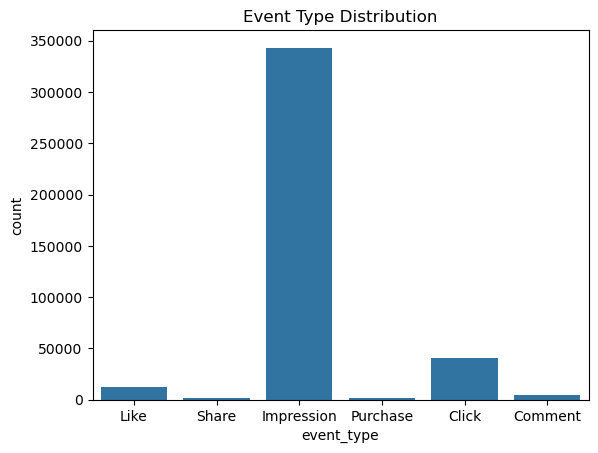

In [17]:
sns.countplot(data=full_data, x='event_type')
plt.title('Event Type Distribution')
plt.show()

**Above Chart Shows**

Campaign is good at getting visibility (impressions), but fewer users are taking action (clicking, purchasing, commenting).

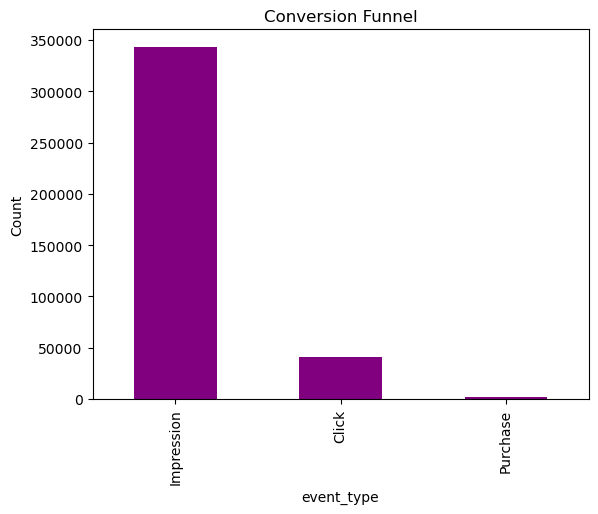

In [18]:
funnel =full_data['event_type'].value_counts().reindex([ 'Impression','Click', 'Purchase']).fillna(0)
funnel.plot(kind='bar', color='purple')
plt.title('Conversion Funnel')
plt.ylabel('Count')
plt.show()

Funnel Chart:
- Show how users move through stages: from seeing an ad → clicking → purchasing


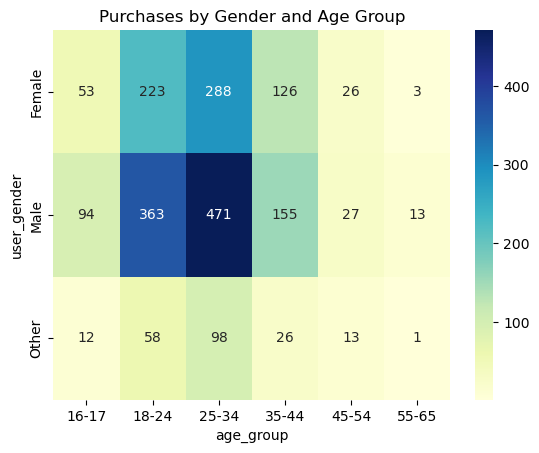

In [19]:
heatmap_data = full_data[full_data['event_type'] == 'Purchase'].groupby(['user_gender', 'age_group']).size().unstack()
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Purchases by Gender and Age Group')
plt.show()

#### Heatmap Analysis: Purchases by Gender and Age Group

This heatmap visualizes the number of purchases made by users across different gender and age group combinations. In Which Male users aged 25–34** made the highest number of purchases (471), followed by **Female users aged 25–34** (288).

**So from above map we can Conclude:**

The majority of purchases come from users aged **18–34**, especially **Male users**. This suggests that marketing strategies and product targeting should prioritize this demographic for better engagement and conversion. Lower activity in older age groups and the "Other" gender may indicate either reduced interest or underrepresentation in the dataset.

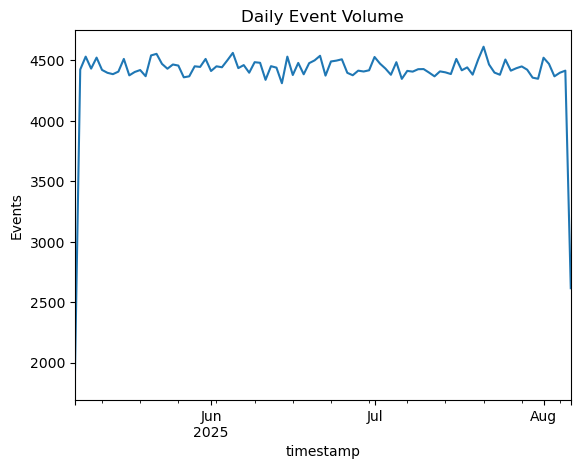

In [20]:
full_data.set_index('timestamp').resample('D')['event_type'].count().plot()
plt.title('Daily Event Volume')
plt.ylabel('Events')
plt.show()

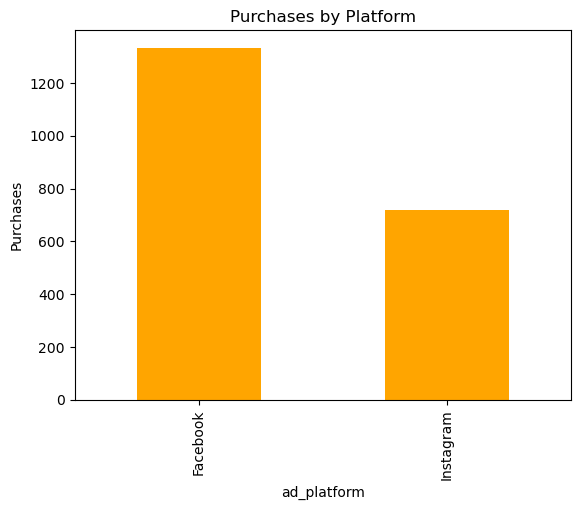

In [22]:
full_data[full_data['event_type'] == 'Purchase'].groupby('ad_platform').size().plot(kind='bar', color='orange')
plt.title('Purchases by Platform')
plt.ylabel('Purchases')
plt.show()

##### **Facebook is the platform where purchase is more**

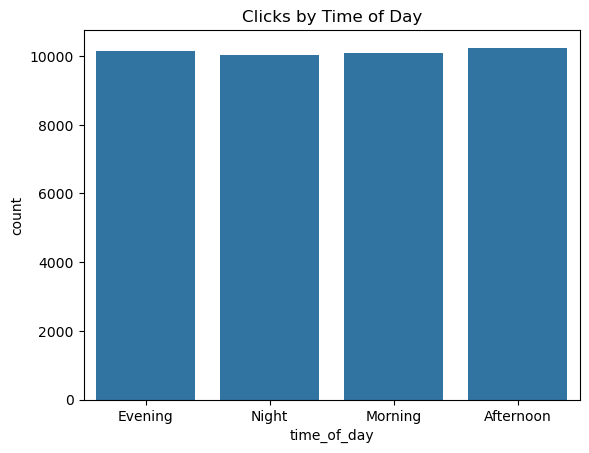

In [23]:
sns.countplot(data=full_data[full_data['event_type'] == 'Click'], x='time_of_day')
plt.title('Clicks by Time of Day')
plt.show()

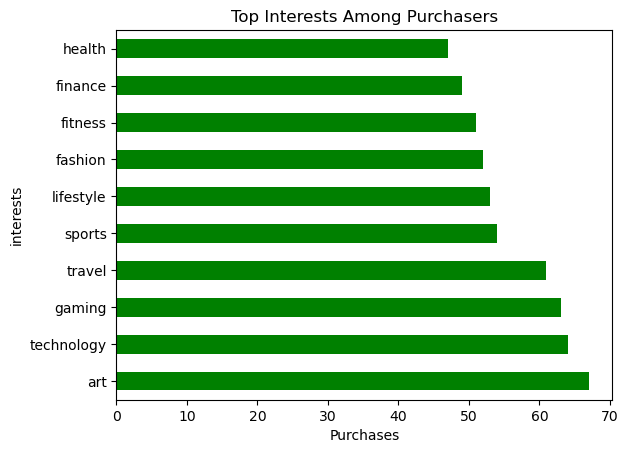

In [24]:
top_interests = full_data[full_data['event_type'] == 'Purchase']['interests'].value_counts().head(10)
top_interests.plot(kind='barh', color='green')
plt.title('Top Interests Among Purchasers')
plt.xlabel('Purchases')
plt.show()

## Business Summary

- By analyzing the above data, I conclude that Instagram video ads targeting users aged 25–34 during evenings and weekends drive the highest conversions.
- Interests like fitness, fashion, and travel show strong purchase behavior. To improve ROI, campaigns should focus on these segments, optimize ad timing, and A/B test creatives for better performance.